# Introduction
___

In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cleaned_mlb.csv')

In [3]:
print(df.shape)
df.head()

(810, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


## Time-Series

In [4]:
from datetime import datetime, timedelta

time_df = df.loc[:,['attendance']]
print(time_df.shape)
time_df.head()

(810, 1)


,attendance
0,41245.00
1,38863.00
2,25982.00
3,28055.00
4,33044.00


In [5]:
train_data = time_df[:729]
test_data = time_df[729:]

In [6]:
train_data.mean()

attendance   29937.82
dtype: float64

## EDA

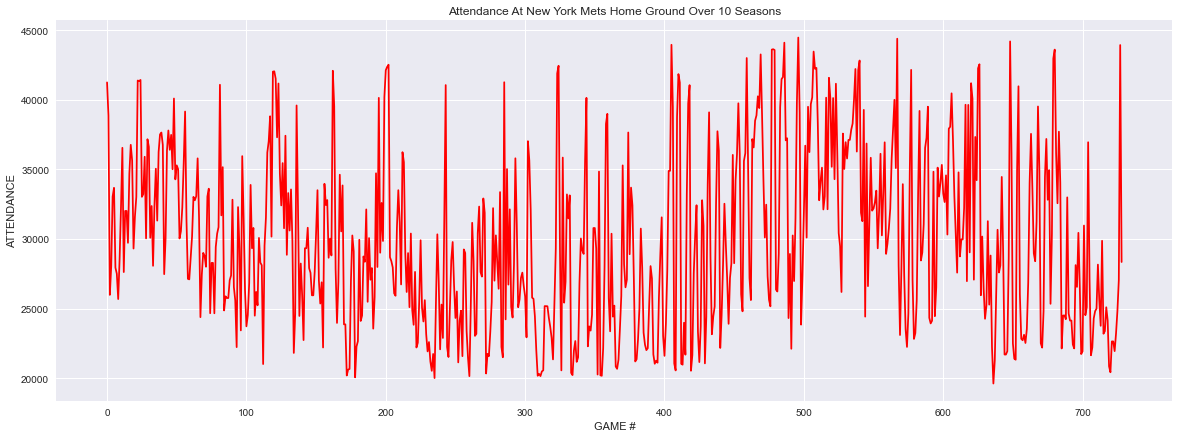

In [7]:
plt.figure(figsize=(20,7))
plt.plot(train_data.index, train_data, color = 'red')
plt.xlabel('GAME #')
plt.ylabel('ATTENDANCE')
plt.title('attendance at new york mets home ground over 10 seasons'.title())
plt.show()

In [8]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(time_df)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -6.30
p-value                         0.00
#Lags Used                      6.00
Number of Observations Used   803.00
dtype: float64


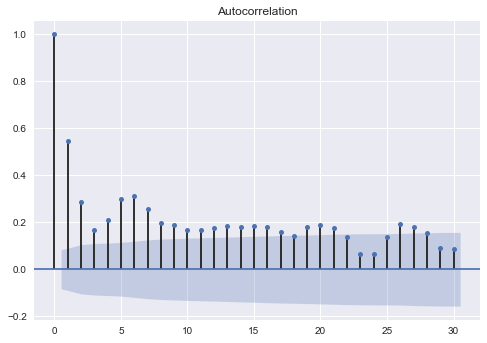

In [9]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_data, alpha=.025, lags=30,); #plot autocorrelation for each lag (alpha is confidence interval)

<Figure size 1440x504 with 0 Axes>

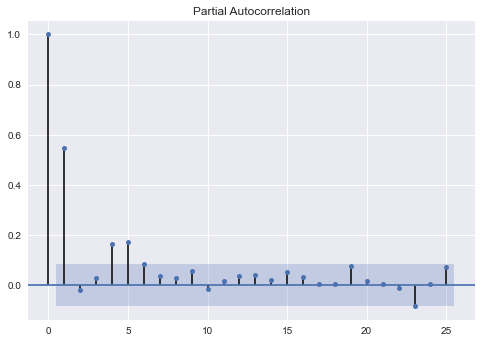

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plt.figure(figsize=(20,7))

plot_pacf(train_data, alpha=.025, lags=25);

## Model Fitting

### Arima Model

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from time import time

model = ARIMA(train_data, order=(0,0,3))
arma = model.fit(disp=0)
print(arma.summary())

                              ARMA Model Results                              
Dep. Variable:             attendance   No. Observations:                  729
Model:                     ARMA(0, 3)   Log Likelihood               -7272.886
Method:                       css-mle   S.D. of innovations           5204.772
Date:                Tue, 03 Nov 2020   AIC                          14555.771
Time:                        17:42:08   BIC                          14578.730
Sample:                             0   HQIC                         14564.630
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.994e+04    375.505     79.727      0.000    2.92e+04    3.07e+04
ma.L1.attendance     0.5703      0.037     15.318      0.000       0.497       0.643
ma.L2.attendance     0.3034 

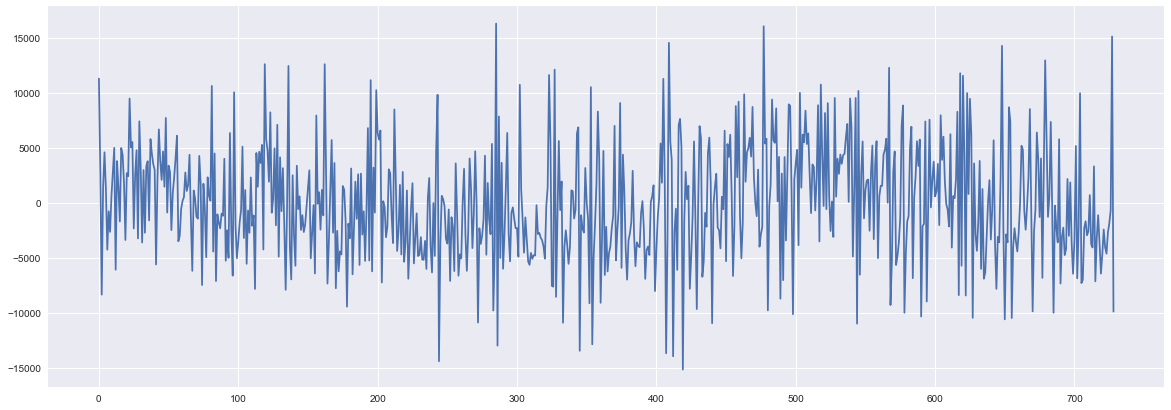

In [12]:
plt.figure(figsize=(20,7))

residuals = pd.DataFrame(arma.resid)
plt.plot(residuals)
plt.show()

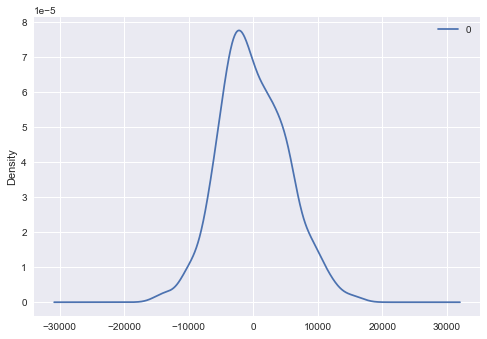

In [13]:
residuals = pd.DataFrame(arma.resid)
residuals.plot(kind='kde',)
plt.show()

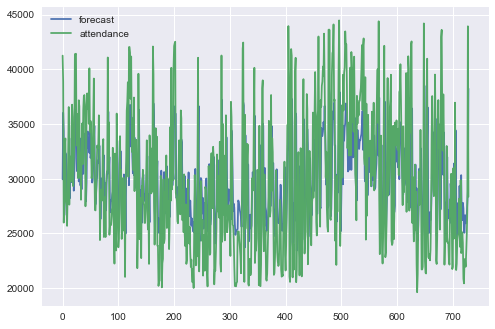

In [38]:
arma.plot_predict();

### Evaluate

In [14]:
train_arma_rmse = np.sqrt(np.mean(arma.resid**2))
train_arma_rmse

5209.8452834489

In [15]:
predictions = arma.predict(start=test_data.index[0], end=test_data.index[-1])

In [16]:
residuals = test_data['attendance'] - predictions

test_arma_rmse = np.sqrt(np.mean(residuals**2))

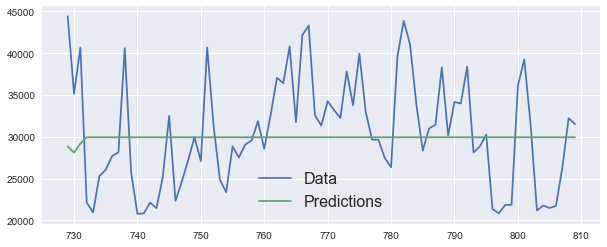

In [17]:
plt.figure(figsize=(10,4))

plt.plot(test_data,)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [43]:
test_arma_rmse

6575.405345480158

### ARIMAX model
___

In [18]:
cols_exog = ['rank', 'night_game', 'cli',
       'games_left-games_behind', 'weekend_x_night',
       'Mar', 'Sep', 'ATL', 'LAD', 'MIA', 'NYY']

In [19]:
train_exog = df.loc[:,cols_exog][:729]
test_exog = df.loc[:,cols_exog][729:]

In [20]:
model = ARIMA(train_data, exog= train_exog, order=(0,0,6))

In [21]:
arimax = model.fit()

In [22]:
print(arimax.summary())  #summary of the model

                              ARMA Model Results                              
Dep. Variable:             attendance   No. Observations:                  729
Model:                     ARMA(0, 6)   Log Likelihood               -7160.844
Method:                       css-mle   S.D. of innovations           4463.483
Date:                Tue, 03 Nov 2020   AIC                          14359.688
Time:                        17:45:34   BIC                          14446.930
Sample:                             0   HQIC                         14393.349
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.998e+04    303.185     98.882      0.000    2.94e+04    3.06e+04
rank                     -831.8887    293.791     -2.832      0.005   -1407.708    -256.069


In [23]:
# get the predictions and residuals
predictions = arimax.predict(start=test_data.index[0], end=test_data.index[-1], exog = test_exog)

residuals = test_data['attendance'] - predictions

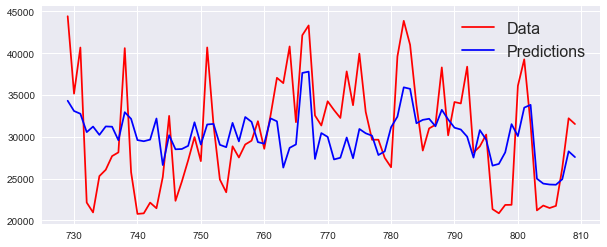

In [24]:
plt.figure(figsize=(10,4))

plt.plot(test_data, color= 'red')
plt.plot(predictions, color= 'blue')

plt.legend(('Data', 'Predictions'), fontsize=16)

In [25]:
print('RMSE:', np.sqrt(np.mean(residuals**2)))
print('MAE:', np.mean(np.abs(residuals)))

RMSE: 5389.555731815985
MAE: 4507.34592389074


### SARIMAX model
___

In [11]:
cols_exog = ['rank', 'games_behind', 'night_game', 'cli', 'streak',
       'games_left-games_behind', 'weekend', 'weekend_x_night', 'Jul', 'Jun',
       'Mar', 'Oct', 'Sep', 'Friday', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'ATL', 'BOS', 'LAA', 'LAD', 'MIA', 'MIL', 'NYY']

In [12]:
train_exog = df.loc[:,cols_exog][:729]
test_exog = df.loc[:,cols_exog][729:]

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

my_order = (2,0,1)
my_seasonal_order = (2, 0, 1, 81)

model = SARIMAX(train_data, exog= train_exog, order=my_order, seasonal_order=my_seasonal_order)  # define model

In [359]:
start = time() 

model_fit = model.fit()  #fit the model

end = time()

Model Fitting Time: 1054.9453151226044


In [363]:
print('Model Fitting Time:', int((end - start)/60), 'Mins.')

Model Fitting Time: 17 Mins.


In [364]:
print(model_fit.summary())  #summary of the model

                                     SARIMAX Results                                      
Dep. Variable:                         attendance   No. Observations:                  729
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 81)   Log Likelihood               -7162.559
Date:                            Mon, 02 Nov 2020   AIC                          14389.119
Time:                                    16:15:20   BIC                          14536.052
Sample:                                         0   HQIC                         14445.810
                                            - 729                                         
Covariance Type:                              opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
rank                    -2180.2133    373.876     -5.831      0.000   -2912.996   -1447.

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [191]:
# Call plot_diagnostics() on the results calculated above 
#model_fit.plot_diagnostics(figsize=(15, 18))
#plt.show()

In [368]:
# get the predictions and residuals
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], exog = test_exog)

residuals = test_data['attendance'] - predictions

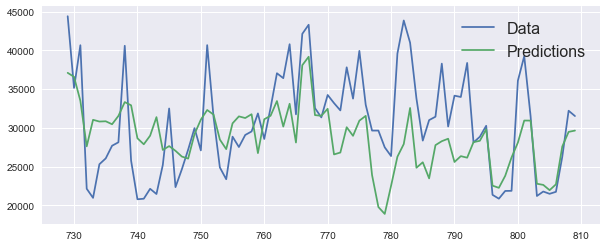

In [371]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [372]:
print('RMSE:', np.sqrt(np.mean(residuals**2)))

RMSE: 5827.96633610893


* Reduce the number exogenoues variables to only ones that were significant

### SARIMAX #2

In [185]:
cols_exog = ['rank', 'night_game', 'streak', 'weekend',
             'Mar', 'Friday', 'ATL', 'LAA', 'MIA', 'NYY']

In [186]:
train_exog = df.loc[:,cols_exog][:729]
test_exog = df.loc[:,cols_exog][729:]

In [95]:
my_order = (2,0,1)
my_seasonal_order = (1, 1, 1, 81)

model = SARIMAX(train_data, exog= train_exog, order=my_order, seasonal_order=my_seasonal_order)  # define model

In [96]:
start = time() 
sarimax3 = model.fit()  #fit the model
end = time()

In [97]:
print('Model Fitting Time:', int((end - start)/60), 'Mins.')

Model Fitting Time: 8 Mins.


In [98]:
print(sarimax3.summary())  #summary of the model

                                     SARIMAX Results                                      
Dep. Variable:                         attendance   No. Observations:                  729
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 81)   Log Likelihood               -6405.370
Date:                            Mon, 02 Nov 2020   AIC                          12842.741
Time:                                    18:22:14   BIC                          12914.323
Sample:                                         0   HQIC                         12870.510
                                            - 729                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rank       -1188.7050    315.709     -3.765      0.000   -1807.483    -569.927
night_game  -580.1643    178.283   

In [99]:
# get the predictions and residuals
predictions = sarimax3.predict(start=test_data.index[0], end=test_data.index[-1], exog = test_exog)

residuals = test_data['attendance'] - predictions

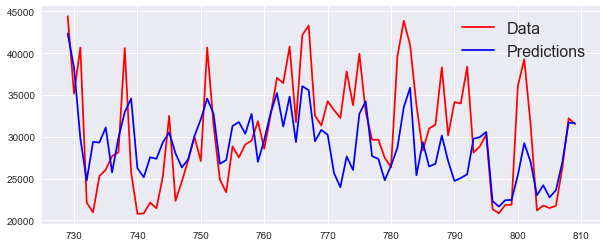

In [103]:
plt.figure(figsize=(10,4))

plt.plot(test_data, color = 'red')
plt.plot(predictions, color = 'blue')

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

In [101]:
print('RMSE:', np.sqrt(np.mean(residuals**2)))

RMSE: 5326.125359533499


In [102]:
np.mean(np.abs(residuals))

4203.315676326561

### SARIAMAX #3

In [332]:
cols_exog = ['rank', 'night_game', 'weekend', 'Friday', 'ATL', 'MIA', 'NYY']

In [333]:
train_exog = df.loc[:,cols_exog][:729]
test_exog = df.loc[:,cols_exog][729:]

In [109]:
my_order = (2,0,1)
my_seasonal_order = (0, 1, 2, 81)

model = SARIMAX(train_data, exog= train_exog, order=my_order, seasonal_order=my_seasonal_order)  # define model

In [111]:
start = time() 
sarimax4 = model.fit()  #fit the model
end = time()

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [112]:
print('Model Fitting Time:', int((end - start)/60), 'Mins.')

Model Fitting Time: 30 Mins.


In [113]:
print(sarimax4.summary())  #summary of the model

                                        SARIMAX Results                                        
Dep. Variable:                              attendance   No. Observations:                  729
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 81)   Log Likelihood               -6395.453
Date:                                 Mon, 02 Nov 2020   AIC                          12816.906
Time:                                         19:02:06   BIC                          12875.067
Sample:                                              0   HQIC                         12839.468
                                                 - 729                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rank       -1094.0220    270.527     -4.044      0.000   -1624.245    -563

In [114]:
# get the predictions and residuals
predictions = sarimax4.predict(start=test_data.index[0], end=test_data.index[-1], exog = test_exog)

residuals = test_data['attendance'] - predictions

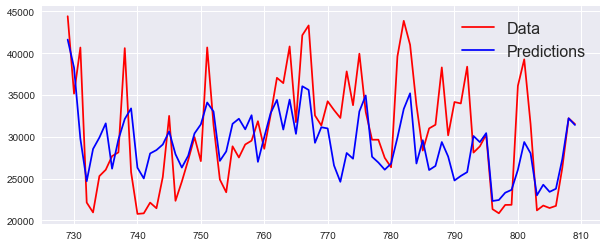

In [115]:
plt.figure(figsize=(10,4))

plt.plot(test_data, color = 'red')
plt.plot(predictions, color = 'blue')

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

In [116]:
print('RMSE:', np.sqrt(np.mean(residuals**2)))

RMSE: 5242.745321103233


In [117]:
np.mean(np.abs(residuals))

4215.123080622624

In [ ]:
sarimax4.save()

### SARIMAX #4

In [122]:
my_order = (2,0,1)
my_seasonal_order = (0, 2, 1, 81)

model = SARIMAX(train_data, exog= train_exog, order=my_order, seasonal_order=my_seasonal_order)  # define model

In [123]:
start = time() 
sarimax5 = model.fit()  #fit the model
end = time()

In [124]:
print('Model Fitting Time:', int((end - start)/60), 'Mins.')

Model Fitting Time: 21 Mins.


In [125]:
print(sarimax5.summary())  #summary of the model

                                     SARIMAX Results                                      
Dep. Variable:                         attendance   No. Observations:                  729
Model:             SARIMAX(2, 0, 1)x(0, 2, 1, 81)   Log Likelihood               -5844.694
Date:                            Mon, 02 Nov 2020   AIC                          11713.389
Time:                                    19:31:56   BIC                          11765.473
Sample:                                         0   HQIC                         11733.715
                                            - 729                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rank        -819.6430   6.19e-07  -1.32e+09      0.000    -819.643    -819.643
night_game  -543.3390   1.15e-06  -

In [126]:
# get the predictions and residuals
predictions = sarimax5.predict(start=test_data.index[0], end=test_data.index[-1], exog = test_exog)

residuals = test_data['attendance'] - predictions

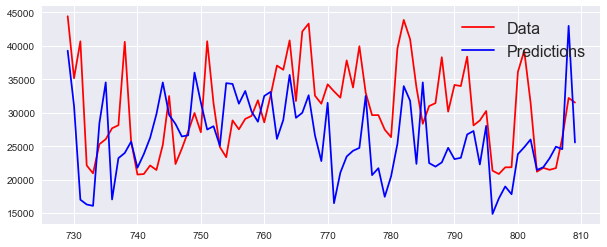

In [127]:
plt.figure(figsize=(10,4))

plt.plot(test_data, color = 'red')
plt.plot(predictions, color = 'blue')

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

In [129]:
print('RMSE:', np.sqrt(np.mean(residuals**2)))
print('MAE:', np.mean(np.abs(residuals)))

RMSE: 8383.952227484304
MAE: 6880.780088926262


### SARIMAX #5

In [39]:
cols_exog = ['rank', 'night_game', 'cli', 'streak', 'weekend', 'Jun',
             'Mar', 'Friday', 'Thursday', 'Wednesday', 'ATL', 'BOS', 'LAA', 'MIA', 'NYY']

In [28]:
train_exog = df.loc[:,cols_exog][:729]
test_exog = df.loc[:,cols_exog][729:]

In [29]:
my_order = (0,0,7)
my_seasonal_order = (0, 1, 1, 81)

model = SARIMAX(train_data, exog= train_exog, order=my_order, seasonal_order=my_seasonal_order)  # define model

In [30]:
start = time() 
sarimax = model.fit()  #fit the model
end = time()

In [31]:
print('Model Fitting Time:', int((end - start)/60), 'Mins.')

Model Fitting Time: 4 Mins.


In [32]:
print(sarimax.summary())  #summary of the model

                                      SARIMAX Results                                       
Dep. Variable:                           attendance   No. Observations:                  729
Model:             SARIMAX(0, 0, 7)x(0, 1, [1], 81)   Log Likelihood               -6464.283
Date:                              Tue, 03 Nov 2020   AIC                          12976.566
Time:                                      18:39:33   BIC                          13083.940
Sample:                                           0   HQIC                         13018.220
                                              - 729                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rank        -613.6738    505.079     -1.215      0.224   -1603.610     376.262
night_game  -394.08

In [33]:
# get the predictions and residuals
predictions = sarimax.predict(start=test_data.index[0], end=test_data.index[-1], exog = test_exog)

residuals = test_data['attendance'] - predictions

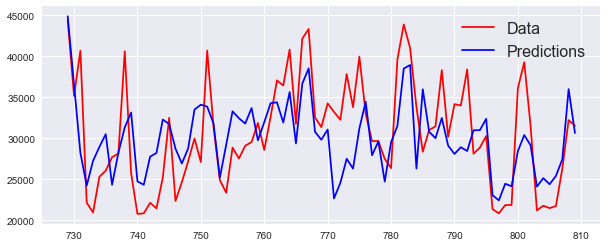

In [34]:
plt.figure(figsize=(10,4))

plt.plot(test_data, color = 'red')
plt.plot(predictions, color = 'blue')

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.show()

In [40]:
print('RMSE:', np.sqrt(np.mean(residuals**2)))
print('MAE:', np.mean(np.abs(residuals)))

RMSE: 5006.82287477612
MAE: 4134.040515341413
